
首先，我们设置一个种子，使得结果可以重复。

In [69]:
import os
os.environ["CUBLAS_WORKSPACE_CONFIG"] = ":4096:8"

import random
import numpy as np
import torch

def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.use_deterministic_algorithms(True)
set_seed(42)

数据的生成

In [59]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt

type(Xn) = <class 'numpy.ndarray'>,tupe(yn) =  <class 'numpy.ndarray'>
Xn.shape = (100, 2)
yn.shape = (100,)
Xn[:3] = [[1.22126008 3.17941071]
 [0.89441596 3.83783635]
 [4.40805817 4.73239851]]
yn[:3] = [0 0 1]


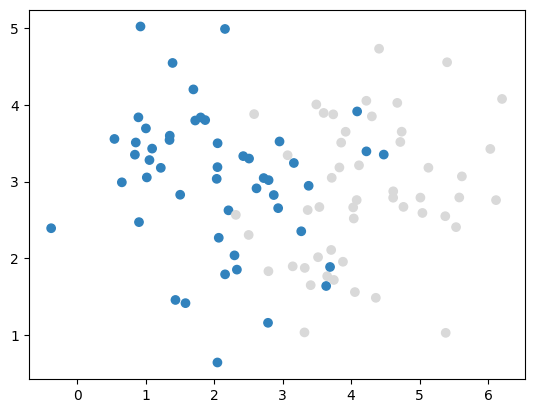

In [60]:
class_centers =  [[2,3],[4,3]]
dev =1
samples = 100
features =2
Xn,yn=make_blobs(n_samples=samples,centers = class_centers,cluster_std = dev,n_features=features,random_state =4) 
print(f"type(Xn) = {(type(Xn))},tupe(yn) =  {type(yn)}")
print(f"Xn.shape = {Xn.shape}")  # bidimensional array
print(f"yn.shape = {yn.shape}")  # unidimensional array
print(f"Xn[:3] = {Xn[:3]}")  # first three samples
print(f"yn[:3] = {yn[:3]}")  # 0 for the first class, 1 for the second class

plt.scatter(Xn[:,0],Xn[:,1],c=yn,cmap='tab20c')
#plt.axis('off')
plt.show()

In [61]:
import numpy as np
import torch

device = "cuda:0" if torch.cuda.is_available() else "cpu"
print(f"Using {device}")

X = torch.from_numpy(np.float32(Xn)).to(device)
y = torch.from_numpy(np.float32(yn)).to(device)

print(f"type(X)  = {type(X)},type(y) = {type(y)}")
print(f"X.shape = {X.shape}")
print(f"y.shape  = ({y.shape})")
print(f"X[:3] = {X[:3]}")
print(f"y[:3] = {y[:3]}")


Using cuda:0
type(X)  = <class 'torch.Tensor'>,type(y) = <class 'torch.Tensor'>
X.shape = torch.Size([100, 2])
y.shape  = (torch.Size([100]))
X[:3] = tensor([[1.2213, 3.1794],
        [0.8944, 3.8378],
        [4.4081, 4.7324]], device='cuda:0')
y[:3] = tensor([0., 0., 1.], device='cuda:0')


In [62]:
a = torch.arange(5)
a= a *10
print(f"a= {a}")
i = torch.tensor([True,False,True,False,True])
print(f"a[i] = {a[i]}")
j = torch.tensor([0,2,4])
print(f"a[j]=  {a[j]}")

a= tensor([ 0, 10, 20, 30, 40])
a[i] = tensor([ 0, 20, 40])
a[j]=  tensor([ 0, 20, 40])


In [63]:
mask = torch.ones(X.shape[0],dtype=bool).to(device)

print(mask.shape)
mask[::3] =0
X_train,y_train=X[mask],y[mask]
print(X_train.device)
X_test,y_test = X[torch.logical_not(mask)],y[torch.logical_not(mask)]

print(f"X_train.shape = {X_train.shape}")
print(f"y_train_shape = {y_train.shape}")
print(f"X_test.shape = {X_test.shape}")
print(f"y_test.shape = {y_test.shape}")

torch.Size([100])
cuda:0
X_train.shape = torch.Size([66, 2])
y_train_shape = torch.Size([66])
X_test.shape = torch.Size([34, 2])
y_test.shape = torch.Size([34])


In [64]:
def regressor(size):
    weights = torch.rand(size,dtype= torch.float32).to(device)
    bias = torch.rand(1,dtype=torch.float32).to(device)
    return weights,bias
def sigmod(x):
    return 1/(1+torch.exp(-x))
def forward(X,weights,bisa):
    return sigmod(torch.matmul(X,weights)+bisa)
def binary_cross_entropy(y_truth,y_pred):
    m= 1 / y_truth.shape[0]
    return -m*(y_truth*torch.log(y_pred)+(1-y_truth)*torch.log(1-y_pred)).sum()

In [65]:
def loss_backward(y_truth,y_pred,X):
    err=(y_pred-y_truth)
    grad_w = (1 / y_truth.shape[0])*torch.matmul(err,X)
    grad_b = (1/y_truth.shape[0])*torch.sum(err)
    return grad_w,grad_b
def optimizer_step(weights,bias,grad_w,grad_b,lr=0.01):
    weights = weights - lr*grad_w
    bias = bias - lr *grad_b
    return weights,bias
def train(X,y_truth,weights,bias,lr=0.01):
    y_pred=forward(X,weights,bias)
    grad_w,grad_b=loss_backward(y_truth,y_pred,X)
    weights,bias = optimizer_step(weights,bias,grad_w,grad_b,lr)
    loss = binary_cross_entropy(y_truth,y_pred).item()
  #  print(f"Step [{epoch}],loss : {loss:.2f}")
    return weights,bias,loss



In [66]:
learning_rate = 0.05
#training_steps=100
#valid_steps=10
weights,bias = regressor(X_train.shape[1])
#weights,bias,bn_train= train(X_train,y_train,weights,bias,lr=learning_rate,training_steps=training_steps,valid_steps=valid_steps)
patience = 0
epoch = 1
best_loss= 100.0
while True:
    if patience >6 :
        break
    weights,bias,bn_train = train(X_train,y_train,weights,bias,lr=learning_rate)
    print(f"Step : [{epoch}]  | loss : {bn_train:.6f} ")

    if best_loss > bn_train:
        best_loss = bn_train
        patience=0
    else:
        patience+=1
    epoch+=1



Step : [1]  | loss : 2.349228 
Step : [2]  | loss : 2.194695 
Step : [3]  | loss : 2.041537 
Step : [4]  | loss : 1.890247 
Step : [5]  | loss : 1.741503 
Step : [6]  | loss : 1.596201 
Step : [7]  | loss : 1.455530 
Step : [8]  | loss : 1.320999 
Step : [9]  | loss : 1.194454 
Step : [10]  | loss : 1.078005 
Step : [11]  | loss : 0.973827 
Step : [12]  | loss : 0.883816 
Step : [13]  | loss : 0.809145 
Step : [14]  | loss : 0.749876 
Step : [15]  | loss : 0.704835 
Step : [16]  | loss : 0.671860 
Step : [17]  | loss : 0.648319 
Step : [18]  | loss : 0.631646 
Step : [19]  | loss : 0.619694 
Step : [20]  | loss : 0.610847 
Step : [21]  | loss : 0.603989 
Step : [22]  | loss : 0.598388 
Step : [23]  | loss : 0.593581 
Step : [24]  | loss : 0.589287 
Step : [25]  | loss : 0.585334 
Step : [26]  | loss : 0.581622 
Step : [27]  | loss : 0.578089 
Step : [28]  | loss : 0.574698 
Step : [29]  | loss : 0.571426 
Step : [30]  | loss : 0.568261 
Step : [31]  | loss : 0.565191 
Step : [32]  | lo

In [67]:
print(f'Learned logistic regressor: y = σ({weights[0]:.2f}*x1 + {weights[1]:.2f}*x2 + {bias.item():.2f})')
y_pred= forward(X_test,weights,bias)

loss = binary_cross_entropy(y_test,y_pred).item()
print(f'Binary cross-entropy on the test set: {loss:.2f}')
prediction = y_pred >0.5
correct = prediction == y_test
accuracy = (torch.sum(correct)/y_test.shape[0])*100


print(correct.sum())
print(torch.sum(correct))


print (f'Accuracy on the test set: {accuracy:.2f}%')

Learned logistic regressor: y = σ(2.62*x1 + -0.39*x2 + -7.32)
Binary cross-entropy on the test set: 0.38
tensor(29, device='cuda:0')
tensor(29, device='cuda:0')
Accuracy on the test set: 85.29%


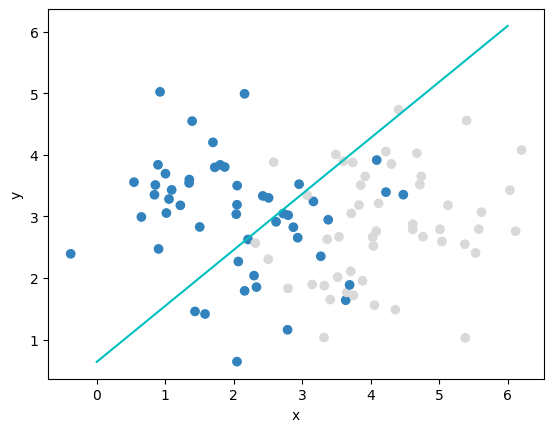

In [68]:
r= -weights[0].item()/weights[1].item()
t= -bias.item() / weights[1].item()
plt.scatter(Xn[:,0],Xn[:,1],c=yn,cmap='tab20c')
plt.xlabel('x')
plt.ylabel('y')

x_hyperplane= np.linspace(0,6,100)
y_hyerplane = r*x_hyperplane+t

#x_hyperplane = np.linspace(0,6,100)
#y_hyperplane = r*x_hyperplane+t
plt.plot(x_hyperplane,y_hyperplane,'-c')
plt.show()

Exercise 


✎ Modify the training loop so that it uses a validation set to decide when to stop the training process instead of using a fixed number of steps. Use a patience term to control the number of consecutive steps without improvement in the validation loss before stopping the training process.
✎ 修改训练循环，使其使用验证集来决定何时停止训练过程，而不是使用固定步骤数。使用耐心项控制连续步骤数，但验证丢失未改善，然后停止训练过程。

✎ Explain why the test set is not used during training.
✎ 解释为什么培训时不使用该测试集。

✎ Explain in detail each line of the code that computes the binary cross-entropy loss and the accuracy when testing the model.
✎ 详细说明计算二元交叉熵损失的代码中每一行，以及测试模型时的准确性。